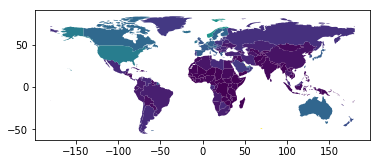

In [4]:
# Import the libraries that will construct the visualization
# Pandas for data handling.
# Geopandas extends pandas and adds handling and plotting of geographic data.
# Matplotlib for display and rendering
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in geopandas sample dataset of countries.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter out Antartica and other regions with 0 estimated population.
world = world[(world.pop_est>0) &(world.name!="Antarctica")]

# Compute the gpd per capita for all remaining countries.
world['gdp_per_cap'] =world.gdp_md_est /world.pop_est

# Plot gpd per capita as a choropleth mao.
world.plot(column='gdp_per_cap');

# Show the plot in the Jupyter Notebook.
plt.show()

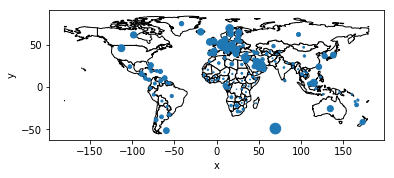

In [13]:
# Import the libraries that will construct the visualization
# Pandas for data handling.
# Geopandas extends pandas and adds handling and plotting of geographic data.
# Matplotlib for display and rendering
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Import and filter the world map dataset as above.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Re-read the data file as a separate variable to perform transformations for proportional symbol mapping.
data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = data[(data.pop_est > 0) & (data.name != 'Antarctica')]

# Compute the centroid of each country from its shape file.
data['centroid_column'] = data.centroid

# Compute the gdp per capita as above.
data['gdp_per_cap'] =data.gdp_md_est / data.pop_est

# Construct a second dataframe with the XY coordinates of each centroid and the gpd per capita data.
centroids = list(data['centroid_column'])
df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))],'x':[centroids[i].x for i in range(len(centroids))],'data':list(data['gdp_per_cap'])})

# Create a base plot showing the outlines of each country on the map.
base = world.plot(color='white',edgecolor='black')

# Annotate the base plot with circles scaled to the size of the data.
df.plot(kind='scatter', x='x', y='y',s=df['data']*1000,ax=base)

# Show the plot in the notebook.
plt.show()


In [15]:
# Import the libraries that will assist in computation
# Pysal contains functions that perform Spatial Autocorrelation computation.
# numpy assists pysal with matrix handling functions and operations.
import pysal
import numpy as np

# Load the St. Louis homicide data set from pysal's examples.
f = pysal.open(pysal.examples.get_path("stl_hom.txt"))

# Select the single column of interest from the dataset.
y = np.array(f.by_col['HR8893'])

# Load the Rook continuity matrix for use in Moran's I computation.
w = pysal.open(pysal.examples.get_path('stl.gal')).read()

# Compute Moran's I for the data.
mi = pysal.Moran(y, w,two_tailed=False)

# Report that value of Moran's I
print (mi.I)

0.243655826218
